# **Project: Fetch Interview Process**
Maria Corina Vinke



--------------
## **Context:**
--------------

Welcome to the workflow on the Fetch Interview Process. I will work to show the three task of the exercise:
  1. Data Exploration
  2. Providing SQL Queries
  3. Communicate to stakeholders

There are three data files: users, transaction and products data of Fetch.

# Import libraries

In [123]:
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # Basic library for data visualization
import seaborn as sns                           # Slightly advanced library for data visualization

from datetime import datetime
import sqlite3
import os
from collections import defaultdict             # A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn

# Import dataset

In [124]:
# Import the dataset
#pathfile="/Users/Maria Vinke/Fetch_analysis/data/"

df_transaction = pd.read_csv("/Users/Maria Vinke/Fetch_analysis/data/TRANSACTION_TAKEHOME.csv")
df_products = pd.read_csv("/Users/Maria Vinke/Fetch_analysis/data/PRODUCTS_TAKEHOME.csv")
df_users = pd.read_csv("/Users/Maria Vinke/Fetch_analysis/data/USER_TAKEHOME.csv")

df_transaction_copy = df_transaction.copy(deep = True) # Copying the data to another DataFrame
df_prod_copy = df_products.copy(deep = True) # Copying the data to another DataFrame
df_user_copy = df_users.copy(deep = True) # Copying the data to another DataFrame

# Overview of Data

In [125]:
df_transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [126]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [127]:
df_products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [128]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [129]:
df_users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [130]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


# 1. *EDA*

1. Handling missing values: Check for and impute/remove missing data.
2. Fixing data types: Ensure numerical, categorical, and datetime formats are correct.
3. Removing duplicates or irrelevant columns.
4. Dealing with outliers, if needed.

# Quality checks


In [131]:
def check_data_quality(df, dataset_name):
    print(f"\n=== Data Quality Analysis for {dataset_name} ===")
    
    # 1. Check for missing values
    missing_values = df.isnull().sum()
    print("\n 1. Missing Values:")
    print(missing_values[missing_values > 0])
    
    # 2. Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"\n 2. Number of duplicate rows: {duplicates}")
    
    # 3. Check data types
    print("\n 3. Data Types:")
    print(df.dtypes)
    
    # 4. Basic statistics
    print("\n 4. Basic Statistics:")
    print(df.describe())
    
    # 5. Check unique values for categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    print("\n 5. Unique values in categorical columns:")
    for col in categorical_columns:
        n_unique = df[col].nunique()
        print(f"{col}: {n_unique} unique values")
        if n_unique < 10:  # Only show all unique values if there are fewer than 10
            print(df[col].value_counts().head())
        print()

In [132]:
# Run quality checks for each dataset
print("Running data quality checks...")
check_data_quality(df_transaction, "Transactions")
check_data_quality(df_products, "Products")
check_data_quality(df_users, "Users")

Running data quality checks...

=== Data Quality Analysis for Transactions ===

 1. Missing Values:
BARCODE    5762
dtype: int64

 2. Number of duplicate rows: 171

 3. Data Types:
RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object

 4. Basic Statistics:
            BARCODE
count  4.423800e+04
mean   1.715863e+11
std    3.269219e+11
min   -1.000000e+00
25%    3.077212e+10
50%    5.210004e+10
75%    8.536765e+10
max    9.347108e+12

 5. Unique values in categorical columns:
RECEIPT_ID: 24440 unique values

PURCHASE_DATE: 89 unique values

SCAN_DATE: 24440 unique values

STORE_NAME: 954 unique values

USER_ID: 17694 unique values

FINAL_QUANTITY: 87 unique values

FINAL_SALE: 1435 unique values


=== Data Quality Analysis for Products ===

 1. Missing Values:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3     

## Additional Specific Checks

In [133]:
# Making a list of all categorical variables for transaction dataframe
cat_col_prod = list(df_transaction.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col_prod:
    print(df_transaction[column].value_counts())
    print("-" * 50);

RECEIPT_ID
bedac253-2256-461b-96af-267748e6cecf    12
bc304cd7-8353-4142-ac7f-f3ccec720cb3     8
4ec870d2-c39f-4a40-bf8a-26a079409b20     8
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711     8
760c98da-5174-401f-a203-b839c4d406be     8
                                        ..
56a368e6-d677-459d-ba05-70a886c3126b     2
56a0e14c-187c-43ec-96ab-b67ac5c197f1     2
569f4be9-63d1-4afd-8ed5-d520ce85b878     2
56946262-15b1-41fd-8814-fc544d35fc6c     2
fffe8012-7dcf-4d84-b6c6-feaacab5074a     2
Name: count, Length: 24440, dtype: int64
--------------------------------------------------
PURCHASE_DATE
2024-06-15    774
2024-07-03    772
2024-07-01    752
2024-08-03    720
2024-07-13    712
             ... 
2024-09-07    428
2024-08-21    422
2024-09-06    394
2024-09-04    390
2024-09-08    282
Name: count, Length: 89, dtype: int64
--------------------------------------------------
SCAN_DATE
2024-09-08 20:00:42.348 Z    12
2024-09-07 17:30:53.326 Z     8
2024-09-08 19:39:01.589 Z     8
2024-09-08 11:13:

In [134]:
# Making a list of all categorical variables for prod dataframe
cat_col_prod = list(df_products.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col_prod:
    print(df_products[column].value_counts())
    print("-" * 50);

CATEGORY_1
Health & Wellness         512695
Snacks                    324817
Beverages                   3990
Pantry                       871
Apparel & Accessories        846
Dairy                        602
Needs Review                 547
Alcohol                      503
Home & Garden                115
Restaurant                    69
Deli & Bakery                 69
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Mature                         3
Vehicles & Parts               3
Baby & Toddler                 3
Beauty                         2
Media                          2
Luggage & Bags                 1
Name: count, dtype: int64
--------------------------------------------------
CATEGORY_2
Candy     

In [135]:
# Making a list of all categorical variables for user dataframe
cat_col_user = list(df_users.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col_user:
    print(df_users[column].value_counts())
    print("-" * 50);

ID
5ef3b4f17053ab141787697d    1
5f889d85746cfc1620c10130    1
5dc6eb9192ad0e12e283bcb2    1
5f1de98e57441c14b826b270    1
5efe2d8d6e0151146c9a31bc    1
                           ..
66caa561ceb005043d74acf3    1
604b67b40134cc12de1361fb    1
66a156f8465f309038b30946    1
5fc5d3b4a071f3282e52f0c6    1
5e7ab436905e9512ff44abc8    1
Name: count, Length: 100000, dtype: int64
--------------------------------------------------
CREATED_DATE
2023-01-12 18:30:15.000 Z    2
2019-08-28 02:21:44.000 Z    2
2024-04-11 02:56:41.000 Z    2
2024-03-11 17:03:02.000 Z    2
2024-02-25 20:43:59.000 Z    2
                            ..
2024-08-25 03:30:41.000 Z    1
2021-03-12 13:08:04.000 Z    1
2024-07-24 19:33:12.000 Z    1
2020-12-01 05:25:08.000 Z    1
2020-03-25 01:30:30.000 Z    1
Name: count, Length: 99942, dtype: int64
--------------------------------------------------
BIRTH_DATE
1970-01-01 00:00:00.000 Z    1272
1979-12-11 08:00:00.000 Z      63
2000-12-12 00:00:00.000 Z      28
2000-12-31 00:0

# DATA VISUALIZATION

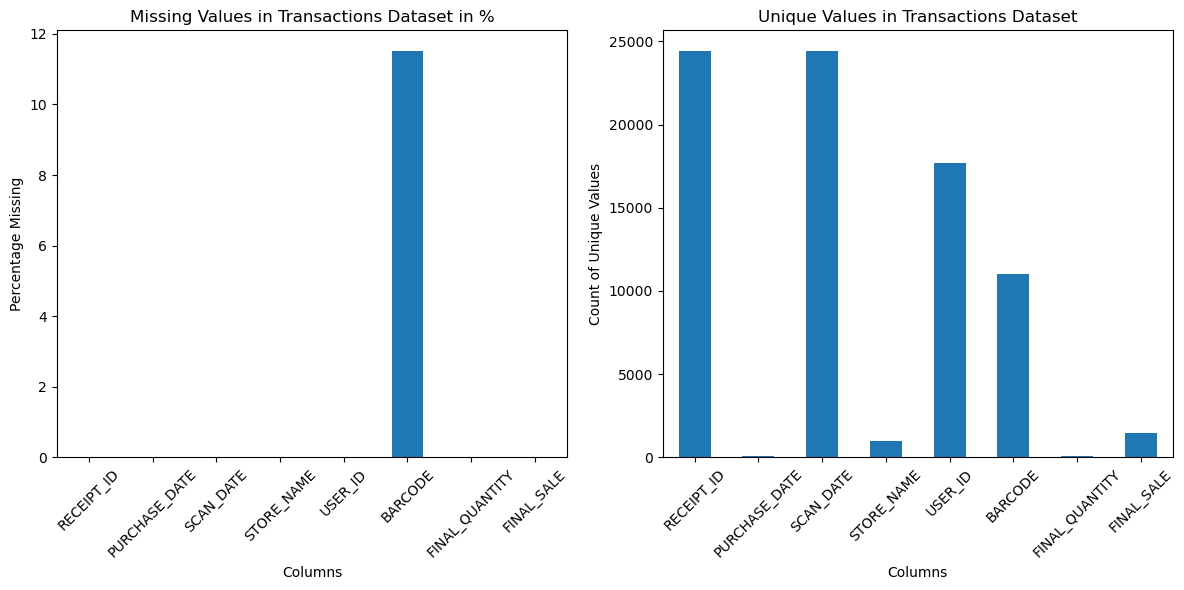

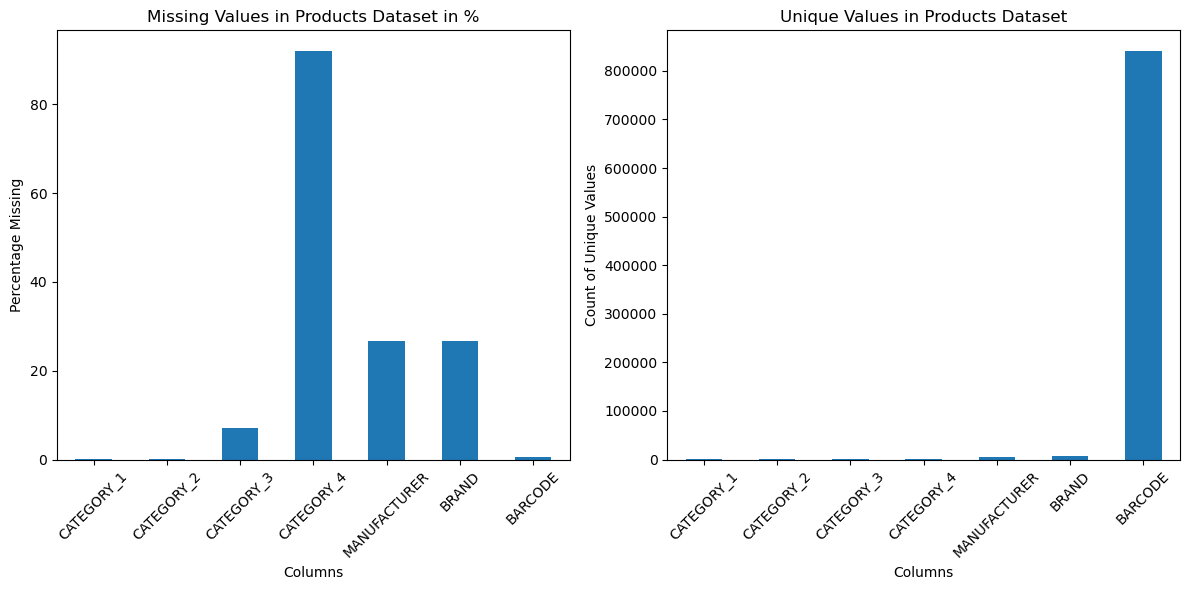

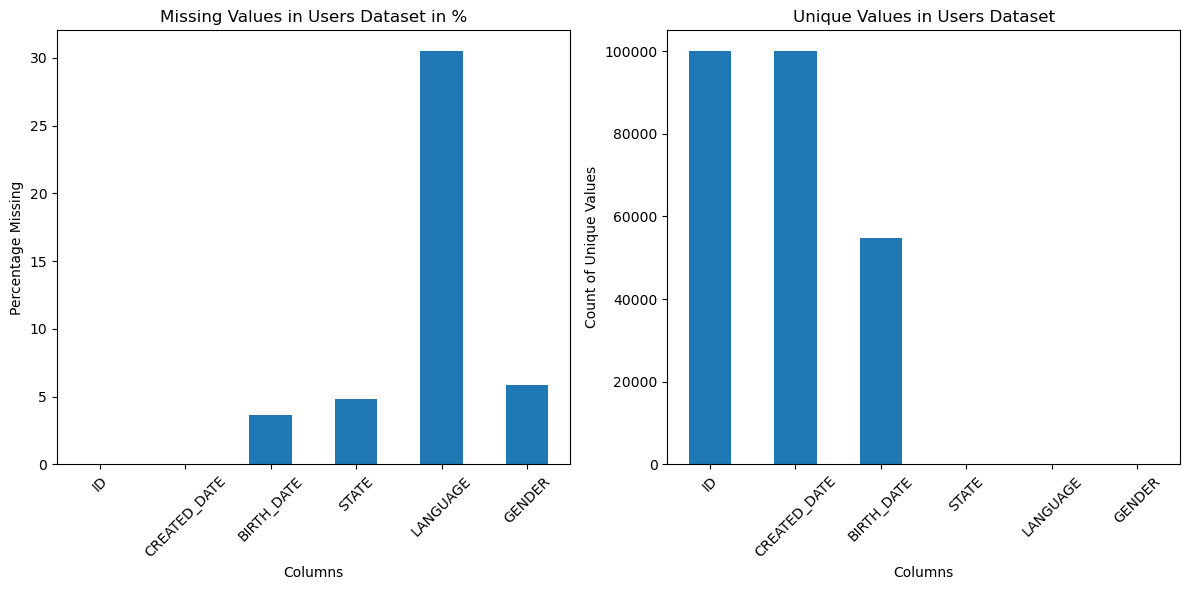

In [136]:
# Create visualizations for data quality
def plot_data_quality(df, name):
    plt.figure(figsize=(12, 6))
    
    # Missing values plot
    plt.subplot(1, 2, 1)
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    missing_percentages.plot(kind='bar')
    plt.title(f'Missing Values in {name} Dataset in %')
    plt.xlabel('Columns')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45)
    
    # Unique values plot
    plt.subplot(1, 2, 2)
    unique_counts = df.nunique()
    unique_counts.plot(kind='bar')
    plt.title(f'Unique Values in {name} Dataset')
    plt.xlabel('Columns')
    plt.ylabel('Count of Unique Values')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Plot quality metrics for each dataset
plot_data_quality(df_transaction, "Transactions")
plot_data_quality(df_products, "Products")
plot_data_quality(df_users, "Users")

# Distribution Plots

In [137]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=60,
            xytext=(0, 3),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

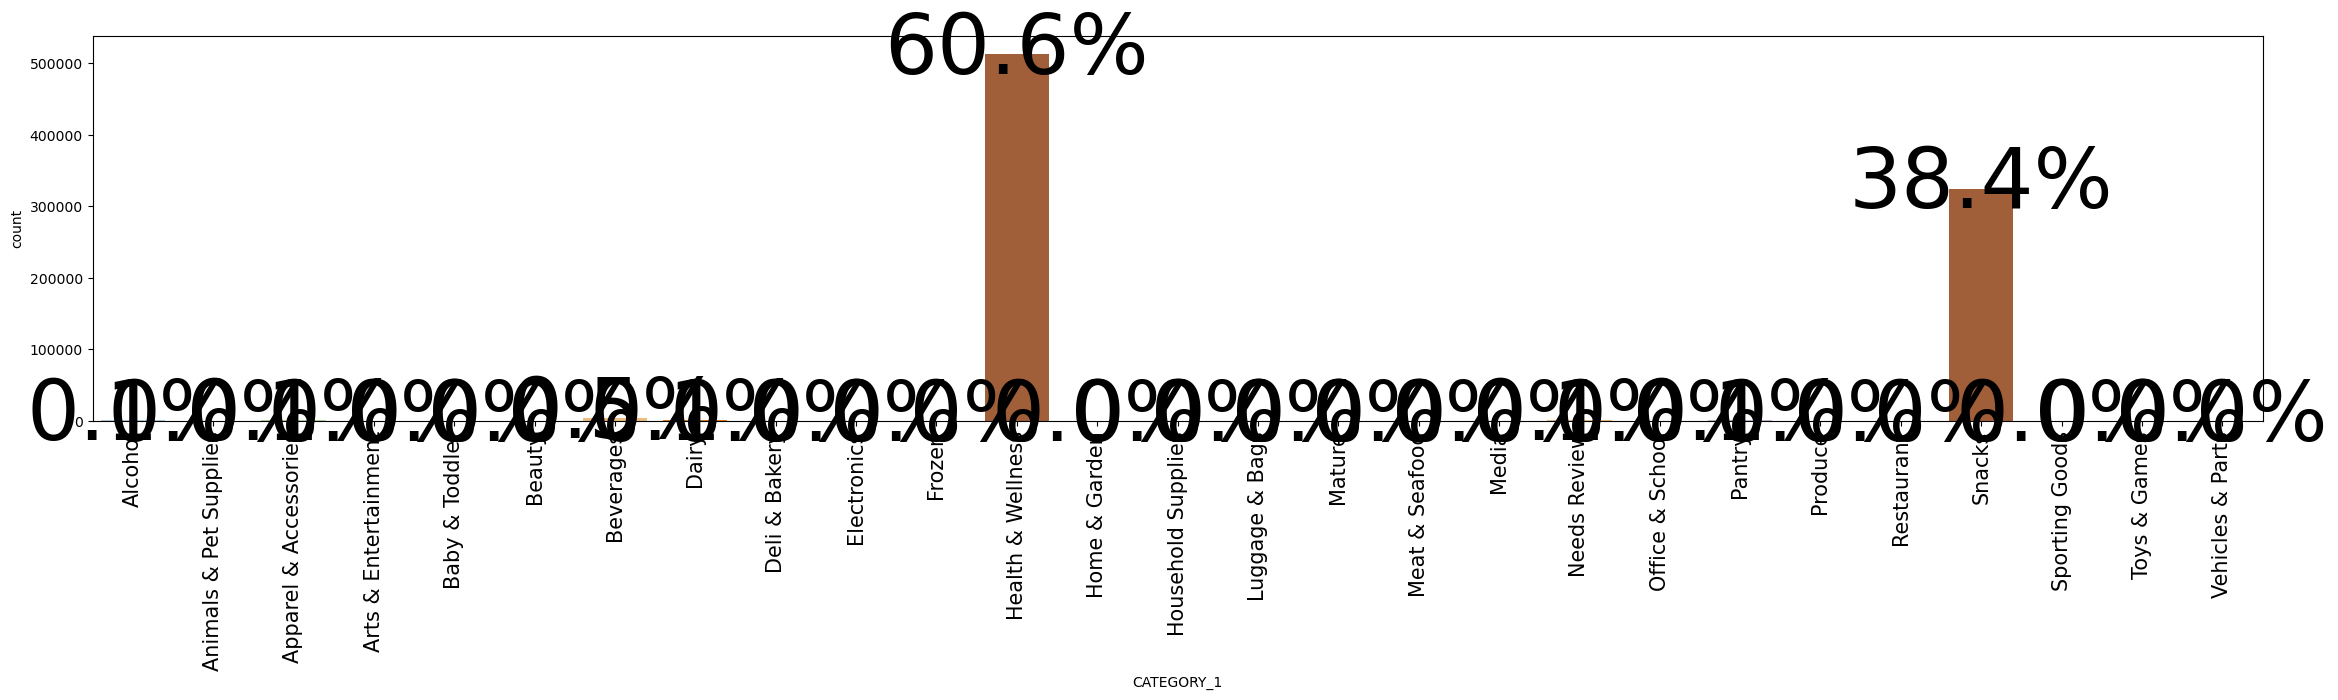

In [138]:
labeled_barplot(df_products, "CATEGORY_1", perc=True)

# Fix Data Quality Issues

#Identified Data Quality Issues:

Transactions Dataset:
- Wrong Data Types:
  - PURCHASE_DATE should be date type
  - SCAN_DATE should be date type
- FINAL_QUANTITY should be a float, but it has a value preventing it, namely "zero".

Products Dataset:


Users Dataset:
- Wrong Data types:
  - BIRTH_DATE should be date type
  - CREATED_DATE should be date type
- Gender has equivalent values that should be homogenized

In [139]:
df_transaction['PURCHASE_DATE'] = pd.to_datetime(df_transaction['PURCHASE_DATE'])
df_transaction['SCAN_DATE'] = pd.to_datetime(df_transaction['SCAN_DATE'])

# Print the DataFrame with the new datetime column
df_transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


In [140]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      50000 non-null  object             
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]     
 2   SCAN_DATE       50000 non-null  datetime64[ns, UTC]
 3   STORE_NAME      50000 non-null  object             
 4   USER_ID         50000 non-null  object             
 5   BARCODE         44238 non-null  float64            
 6   FINAL_QUANTITY  50000 non-null  object             
 7   FINAL_SALE      50000 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(5)
memory usage: 3.1+ MB


In [141]:
# FINAL_QUANTITY should be a float, but it has a value preventing it, namely "zero".

df_transaction['FINAL_QUANTITY'] = df_transaction['FINAL_QUANTITY'].replace('zero', 0)
df_transaction['FINAL_QUANTITY'] = df_transaction['FINAL_QUANTITY'].astype(float)

df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      50000 non-null  object             
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]     
 2   SCAN_DATE       50000 non-null  datetime64[ns, UTC]
 3   STORE_NAME      50000 non-null  object             
 4   USER_ID         50000 non-null  object             
 5   BARCODE         44238 non-null  float64            
 6   FINAL_QUANTITY  50000 non-null  float64            
 7   FINAL_SALE      50000 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), object(4)
memory usage: 3.1+ MB


**We can now see they have been converted**

In [142]:
df_users['BIRTH_DATE'] = pd.to_datetime(df_users['BIRTH_DATE'])
df_users['CREATED_DATE'] = pd.to_datetime(df_users['CREATED_DATE'])

# Print the DataFrame with the new datetime column
df_users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female


In [143]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         95188 non-null   object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


#### Gender replacement

female                    64240
male                      25829
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196

----

not_listed                  180    not_specified
Non-Binary                   34    non_binary
not_specified                28    (We don't know if this means if it's unknown so we leave as not_specified)
My gender isn't listed        5    not_specified
Prefer not to say             1    prefer_not_to_say

So in general we would have 7 unique genders: 

female           
male                      
transgender                
prefer_not_to_say          
non_binary                  
unknown                     
not_specified

In [144]:
# Replace multiple values using a dictionary
df_users['GENDER'] = df_users['GENDER'].replace({'not_listed': 'not_specified', 'Non-Binary': 'non_binary',"My gender isn't listed": 'not_specified',"Prefer not to say":'prefer_not_to_say'})

print(df_users['GENDER'].value_counts())

GENDER
female               64240
male                 25829
transgender           1772
prefer_not_to_say     1351
non_binary             507
not_specified          213
unknown                196
Name: count, dtype: int64


# 2. Provide SQL queries


Answering questions

* Closed-ended questions:
  - 
What are the top 5 brands by receipts scanned among users 21 and over?
* Open-ended questions:

  - Which is the leading brand in the Dips & Salsa category?
  - At what percent has Fetch grown year over year?


In [158]:
# Load the dataframes into SQL tables with replace if they exist
df_transaction.to_sql('transactions', conn, index=False, if_exists='replace')
df_products.to_sql('products', conn, index=False, if_exists='replace')
df_users.to_sql('users', conn, index=False, if_exists='replace')

# SQL query
query = """
WITH user_ages AS (
    SELECT 
        ID,
        CAST(
            (julianday('now') - julianday(birth_date)) / 365.25 
            AS INTEGER
        ) as age
    FROM users
)
SELECT 
    p.brand,
    COUNT(DISTINCT t.receipt_id) as receipt_count,
    ROUND(
        COUNT(DISTINCT t.receipt_id) * 100.0 / (
            SELECT COUNT(DISTINCT receipt_id) 
            FROM transactions
        ),
        2
    ) as percentage_of_total
FROM transactions t
JOIN products p 
    ON t.barcode = p.barcode
JOIN user_ages u 
    ON t.user_id = u.ID
WHERE u.age >= 21
GROUP BY p.brand
ORDER BY receipt_count DESC
LIMIT 5;
"""

# Execute query and load results into a DataFrame
results_df = pd.read_sql_query(query, conn)

# Display results
print("\nTop 5 Brands by Receipt Count (Users 21+):")
print(results_df)


Top 5 Brands by Receipt Count (Users 21+):
             BRAND  receipt_count  percentage_of_total
0      NERDS CANDY              3                 0.01
1             DOVE              3                 0.01
2             None              3                 0.01
3          TRIDENT              2                 0.01
4  SOUR PATCH KIDS              2                 0.01


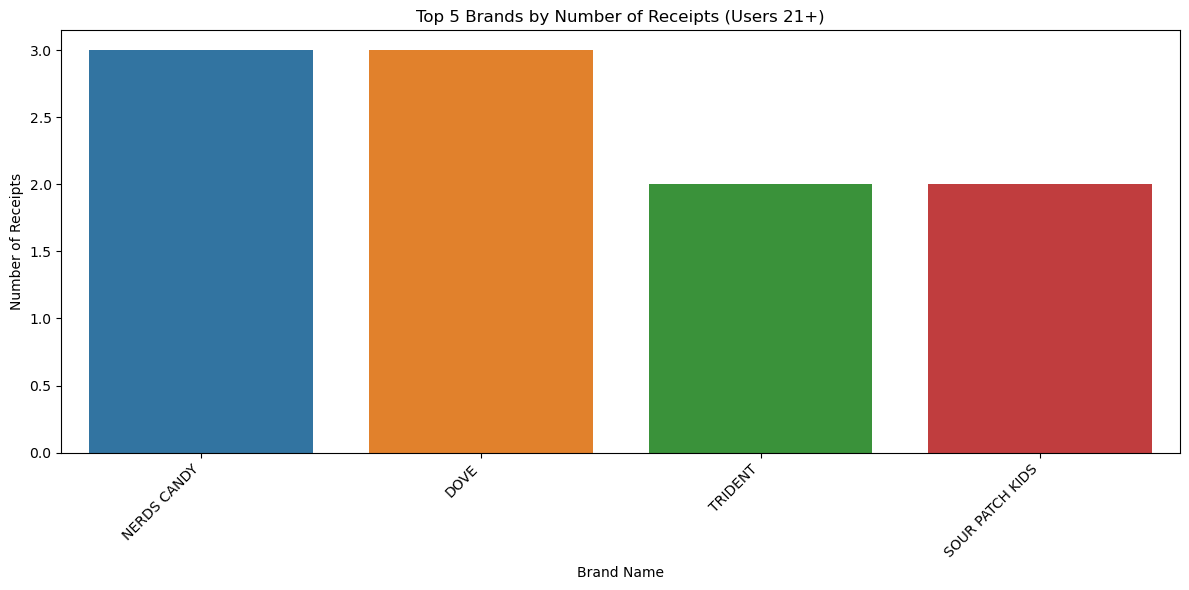

In [161]:
# Create visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='BRAND', y='receipt_count')
plt.title('Top 5 Brands by Number of Receipts (Users 21+)')
plt.xlabel('Brand Name')
plt.ylabel('Number of Receipts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Open-ended questions:

  - Which is the leading brand in the Dips & Salsa category?
  - At what percent has Fetch grown year over year?


In [169]:
# Search for "Dips & Salsa" in each category column
category_columns_query = """
SELECT DISTINCT
    'category_1' as column_name,
    category_1 as value
FROM products
WHERE category_1 LIKE '%Dips%' OR category_1 LIKE '%Salsa%'
UNION ALL
SELECT DISTINCT
    'category_2' as column_name,
    category_2 as value
FROM products
WHERE category_2 LIKE '%Dips%' OR category_2 LIKE '%Salsa%'
UNION ALL
SELECT DISTINCT
    'category_3' as column_name,
    category_3 as value
FROM products
WHERE category_3 LIKE '%Dips%' OR category_3 LIKE '%Salsa%'
UNION ALL
SELECT DISTINCT
    'category_4' as column_name,
    category_4 as value
FROM products
WHERE category_4 LIKE '%Dips%' OR category_4 LIKE '%Salsa%';
"""

# Execute query to find where Dips & Salsa appears
category_search = pd.read_sql_query(category_columns_query, conn)
print("\nSearching for 'Dips' or 'Salsa' in category columns:")
print(category_search)



Searching for 'Dips' or 'Salsa' in category columns:
  column_name         value
0  category_2  Dips & Salsa
1  category_3         Salsa
2  category_3    Other Dips
3  category_3  Dessert Dips


* So we see it's under Category 2

In [174]:
# Query 5: Leading brand in Dips & Salsa category
query5 = """
SELECT 
    p.brand,
    COUNT(DISTINCT t.receipt_id) as receipt_count,
    COUNT(DISTINCT t.user_id) as unique_customers,
    COUNT(*) as total_transactions
FROM transactions t
JOIN products p ON t.BARCODE = p.BARCODE
WHERE p.category_2= 'Dips & Salsa'
GROUP BY p.brand
ORDER BY total_transactions DESC
LIMIT 5;
"""

dips_salsa_brands = run_sql_query(query5, conn)
print("\nVisualization:")
plt.figure(figsize=(12, 6))
sns.barplot(data=dips_salsa_brands, x='brand', y='total_transactions')
plt.xticks(rotation=45)
plt.title('Top Brands in Dips & Salsa Category by Sales')
plt.tight_layout()
plt.show()

Running query:
 
SELECT 
    p.brand,
    COUNT(DISTINCT t.receipt_id) as receipt_count,
    COUNT(DISTINCT t.user_id) as unique_customers,
    COUNT(*) as total_transactions
FROM transactions t
JOIN products p ON t.BARCODE = p.BARCODE
WHERE p.category_2= 'Dips & Salsa'
GROUP BY p.brand
ORDER BY total_transactions DESC
LIMIT 5;


Results:

Visualization:


ValueError: Could not interpret input 'brand'

<Figure size 1200x600 with 0 Axes>

In [175]:
# Query 6: Year-over-year growth
query6 = """
WITH yearly_metrics AS (
    SELECT 
        strftime('%Y', date) as year,
        COUNT(DISTINCT receipt_id) as receipt_count,
        COUNT(DISTINCT user_id) as user_count,
        SUM(total_spent) as total_sales
    FROM transactions
    GROUP BY strftime('%Y', date)
)
SELECT 
    year,
    receipt_count,
    user_count,
    total_sales,
    ROUND((receipt_count - LAG(receipt_count) OVER (ORDER BY year)) * 100.0 / 
          LAG(receipt_count) OVER (ORDER BY year), 2) as receipt_growth,
    ROUND((user_count - LAG(user_count) OVER (ORDER BY year)) * 100.0 / 
          LAG(user_count) OVER (ORDER BY year), 2) as user_growth,
    ROUND((total_sales - LAG(total_sales) OVER (ORDER BY year)) * 100.0 / 
          LAG(total_sales) OVER (ORDER BY year), 2) as sales_growth
FROM yearly_metrics
ORDER BY year;
"""

yoy_growth = run_sql_query(query6, conn)
print("\nVisualization:")
plt.figure(figsize=(12, 6))
yoy_growth.set_index('year')[['receipt_growth', 'user_growth', 'sales_growth']].plot(kind='bar')
plt.title('Year-over-Year Growth Metrics')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

Running query:
 
WITH yearly_metrics AS (
    SELECT 
        strftime('%Y', date) as year,
        COUNT(DISTINCT receipt_id) as receipt_count,
        COUNT(DISTINCT user_id) as user_count,
        SUM(total_spent) as total_sales
    FROM transactions
    GROUP BY strftime('%Y', date)
)
SELECT 
    year,
    receipt_count,
    user_count,
    total_sales,
    ROUND((receipt_count - LAG(receipt_count) OVER (ORDER BY year)) * 100.0 / 
          LAG(receipt_count) OVER (ORDER BY year), 2) as receipt_growth,
    ROUND((user_count - LAG(user_count) OVER (ORDER BY year)) * 100.0 / 
          LAG(user_count) OVER (ORDER BY year), 2) as user_growth,
    ROUND((total_sales - LAG(total_sales) OVER (ORDER BY year)) * 100.0 / 
          LAG(total_sales) OVER (ORDER BY year), 2) as sales_growth
FROM yearly_metrics
ORDER BY year;


Results:


DatabaseError: Execution failed on sql '
WITH yearly_metrics AS (
    SELECT 
        strftime('%Y', date) as year,
        COUNT(DISTINCT receipt_id) as receipt_count,
        COUNT(DISTINCT user_id) as user_count,
        SUM(total_spent) as total_sales
    FROM transactions
    GROUP BY strftime('%Y', date)
)
SELECT 
    year,
    receipt_count,
    user_count,
    total_sales,
    ROUND((receipt_count - LAG(receipt_count) OVER (ORDER BY year)) * 100.0 / 
          LAG(receipt_count) OVER (ORDER BY year), 2) as receipt_growth,
    ROUND((user_count - LAG(user_count) OVER (ORDER BY year)) * 100.0 / 
          LAG(user_count) OVER (ORDER BY year), 2) as user_growth,
    ROUND((total_sales - LAG(total_sales) OVER (ORDER BY year)) * 100.0 / 
          LAG(total_sales) OVER (ORDER BY year), 2) as sales_growth
FROM yearly_metrics
ORDER BY year;
': no such column: date

# 3. Communicate with stakeholders

Key data quality issues and outstanding questions about the data

One interesting trend in the dat

Use a finding from part 2 or come up with a new insig

t
Request for action: explain what additional help, info, etc. you need to make sense of the data and resolve any outstanding issues